### 1.Import Dependencies

In [1]:
import os
import pandas as pd #alias
import numpy as np  #alias
import seaborn as sns
import matplotlib.pyplot as plt 

### 2.Basic processing

In [2]:
df = pd.read_csv('c:\\Users\\Tenura Pinsara\\Desktop\\ML\\Zuu\\mini_p_00\\Advanced_Telco_Customer_Churn_Prediction\\data\\processed\\Churn_Missing_Value_Handled.csv')
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(f"No of Rows : {len(df)}")

No of Rows : 7043


### 3. Outlier detection techniques

#### 3.1 Distribution plots

In [4]:
categorical_columns = ['gender', 
                       'SeniorCitizen', 
                       'Partner', 
                       'Dependents', 
                       'PhoneService', 
                       'MultipleLines', 
                       'InternetService', 
                       'OnlineSecurity', 
                       'OnlineBackup', 
                       'DeviceProtection', 
                       'TechSupport', 
                       'StreamingTV', 
                       'StreamingMovies', 
                       'Contract', 
                       'PaperlessBilling', 
                       'PaymentMethod']

numerical_columns = ['tenure', 
                     'MonthlyCharges',
                     'TotalCharges']

print(f"Categorical Columns : {len(categorical_columns)}")
print(f"Numerical Columns : {len(numerical_columns)}")

Categorical Columns : 16
Numerical Columns : 3


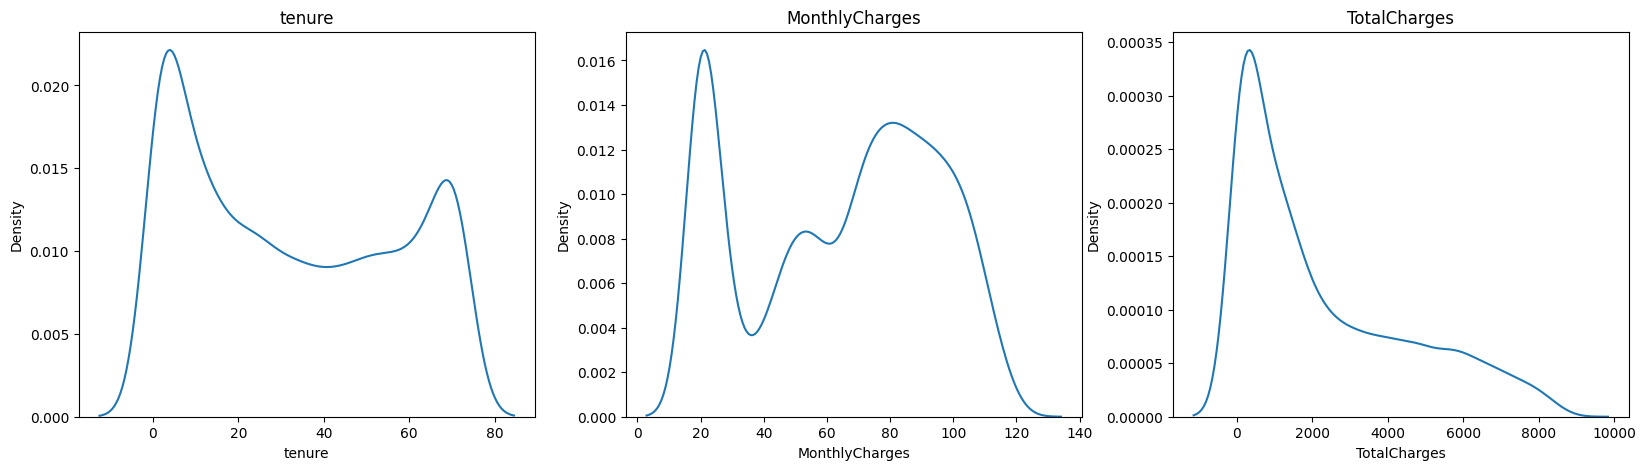

In [5]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
axes = axes.flatten()

for i,col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col],ax=axes[i])
    axes[i].set_title(col)


plt.show()

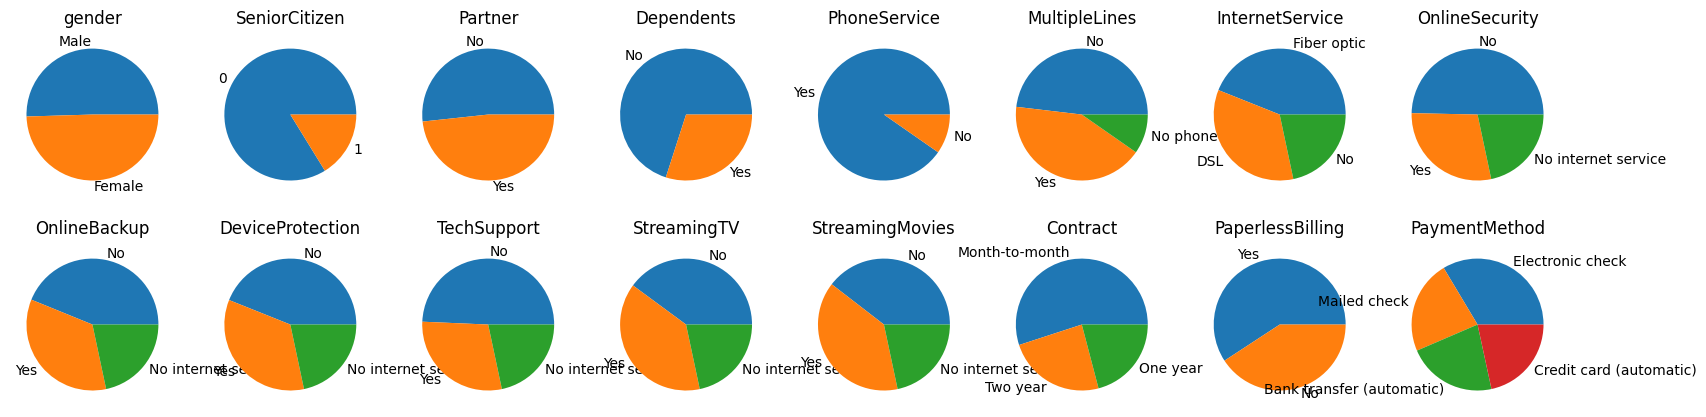

In [6]:
fig, axes = plt.subplots(2, 8, figsize=(20, 5))  # Bigger figure for clarity
axes = axes.flatten()  # Convert 2D axes array to 1D for easy indexing

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie', 
        ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')  # Remove y-label for pie charts


plt.show()


#### 3.2 box plots

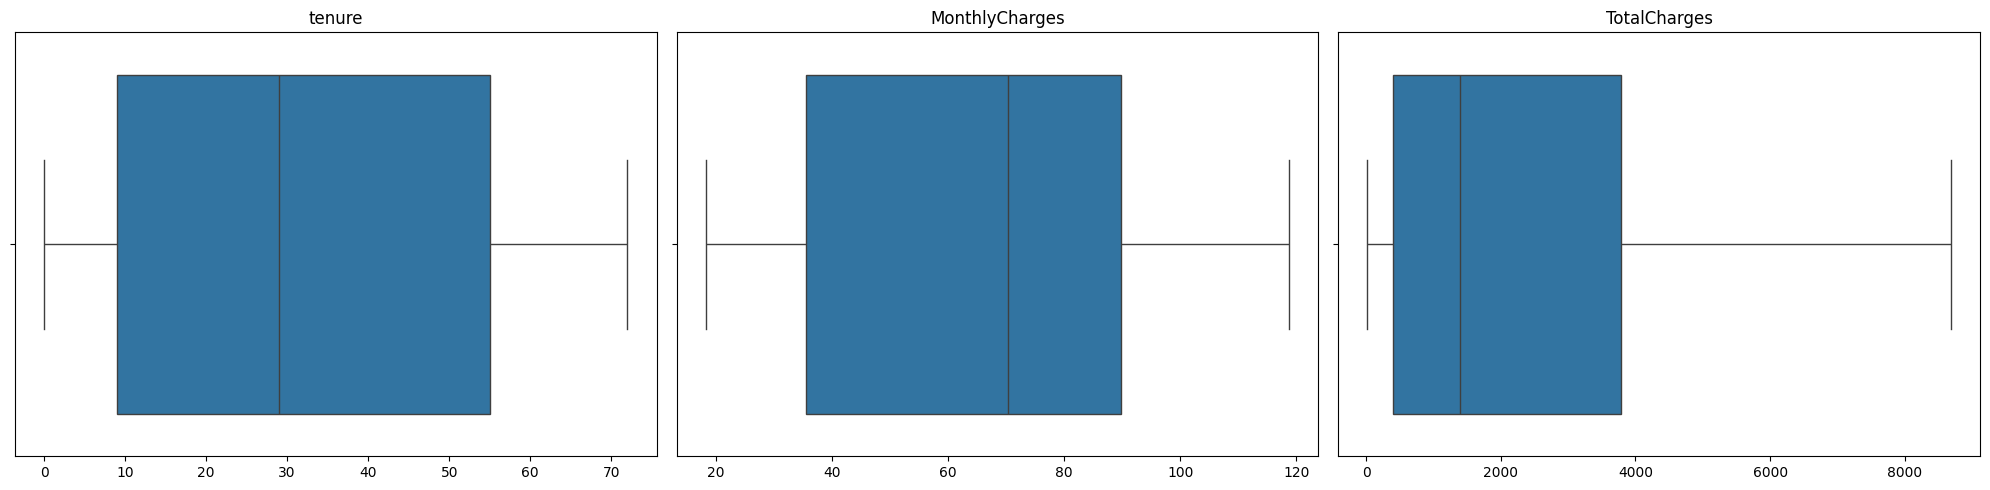

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through each column
for idx, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel("")  # Remove redundant x-labels

# Hide any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### 3.3 empirical rule / 3-sigma rule

In [10]:
def find_anomalies(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3*std)
    lower_bound = mean - (3*std)

    return (data > upper_bound) | (data < lower_bound)

In [11]:
numerical_columns = ['tenure', 
                     'MonthlyCharges',
                     'TotalCharges']

for col in numerical_columns:
    n_outliers = find_anomalies(df[col]).sum()
    n_outliers_percentage = (n_outliers / len(df)) * 100
    print(f"{col}: {n_outliers} outliers ({n_outliers_percentage:.3f}%)")

tenure: 0 outliers (0.000%)
MonthlyCharges: 0 outliers (0.000%)
TotalCharges: 0 outliers (0.000%)


#### 3.4 IQR method

In [12]:
def find_anomalies(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return (data > upper_bound) | (data < lower_bound)



In [13]:
numerical_columns = ['tenure', 
                     'MonthlyCharges',
                     'TotalCharges']

for col in numerical_columns:
    n_outliers = find_anomalies(df[col]).sum()
    n_outliers_percentage = (n_outliers / len(df)) * 100
    print(f"{col}: {n_outliers} outliers ({n_outliers_percentage:.3f}%)")

tenure: 0 outliers (0.000%)
MonthlyCharges: 0 outliers (0.000%)
TotalCharges: 0 outliers (0.000%)


In [15]:
df.to_csv('c:\\Users\\Tenura Pinsara\\Desktop\\ML\\Zuu\\mini_p_00\\Advanced_Telco_Customer_Churn_Prediction\\data\\processed\\Churn_Outliers_Handled.csv',index=False)